# Задание 2. Типы шума на изображении, моделирование аддитивного шума, алгоритмы фильтрации изображений.

### 1) Моделирование аддитивного шума. (Постоянный шум)

**Импортируем OpenCV и прочее**

In [13]:
import cv2
import statistics as st
import math
import time
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import random
print(cv2.__version__)

4.4.0


**Добавляем изображение**

In [14]:
img = cv2.imread("img1.jpg")

**Изображение:**

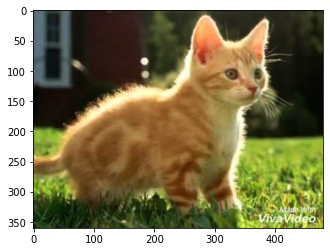

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Функция генерации шума с равномерным распределением.** (img - изображение для зашумления, p - вероятность шума, color - цвет шума(white - белый, bw - чёрный и белый)

In [16]:
def generate_constant_noise(img, p=0.1, color='white'):
    for i, row in enumerate(img):
        for j, _ in enumerate(row):
            if random.random() < p:
                if color == 'white' or random.random() < 0.5:
                    img[i][j] = [255, 255, 255]
                else:
                    img[i][j] = [0, 0, 0]

**Зашумляем изображение**

In [17]:
generate_constant_noise(img)

**Изображение с шумом:**

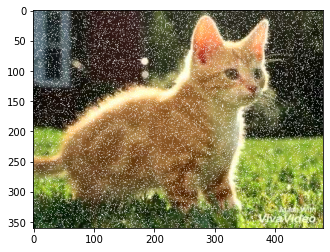

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 2) Удаление шума. Медианный фильтр

**Изображение:**

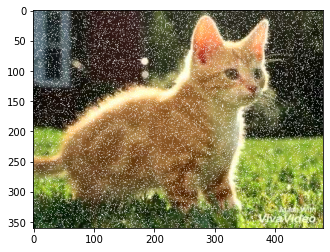

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**OpenCV реализация**

In [20]:
start_time = time.time()
img_cv = cv2.medianBlur(img, 3)
end_time = time.time()

**Изображение:**

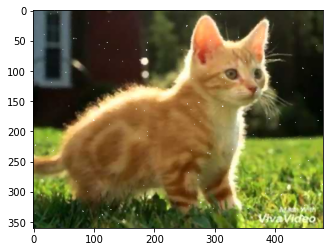

In [21]:
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

**Время работы:**

In [22]:
print(end_time - start_time)

0.006644725799560547


**Реализуем медианный фильтр**

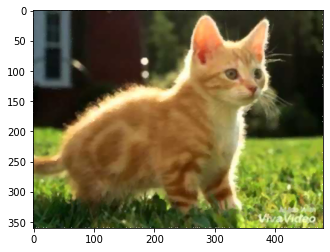

In [23]:
start_time = time.time()

img_my = img
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        img_my[y,x]=img[y,x]
members=[img[0,0]]*9
for y in range(1,img.shape[0]-1):
    for x in range(1,img.shape[1]-1):
        members[0] = img[y-1,x-1]
        members[1] = img[y,x-1]
        members[2] = img[y+1,x-1]
        members[3] = img[y-1,x]
        members[4] = img[y,x]
        members[5] = img[y+1,x]
        members[6] = img[y-1,x+1]
        members[7] = img[y,x+1]
        members[8] = img[y+1,x+1]
        for i in range(0, 9):
            for j in range(0, 8):
                med1 = int(members[j][0]) + int(members[j][1]) + int(members[j][2])
                med2 = int(members[j+1][0]) + int(members[j+1][1]) + int(members[j+1][2])
                if (med1 > med2):
                    members[j], members[j+1] = members[j+1], members[j]
        img_my[y,x]=members[4]
        
end_time = time.time()
plt.imshow(cv2.cvtColor(img_my, cv2.COLOR_BGR2RGB))

**Время работы**

In [24]:
print(end_time - start_time)

88.40934729576111


**Сравниваем качество с помощью PSNR**

In [26]:
def psnr(image_1, image_2):
    image_change = (image_1 - image_2) ** 2
    
    MSE_R = st.fmean([pixel[0] for row in image_change for pixel in row])
    MSE_G = st.fmean([pixel[1] for row in image_change for pixel in row])
    MSE_B = st.fmean([pixel[2] for row in image_change for pixel in row])

    MSE = (MSE_R + MSE_G + MSE_B) / 3

    MAX_I = 2 ** 8

    PSNR = 10 * math.log10(MAX_I ** 2 / MSE);
    return PSNR

In [27]:
print(psnr(img_cv, img_my))

39.36563004544673
